In [165]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [166]:
df=pd.read_csv("employee (1).csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [167]:
df.shape

(148, 6)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [169]:
df[df.duplicated()]

,Company,Age,Salary,Place,Country,Gender
84,CTS,43.0,NaN,Mumbai,India,0
130,TCS,21.0,4824.0,Mumbai,India,0
131,Infosys,NaN,5835.0,Mumbai,India,0
144,Infosys,22.0,8787.0,Calcutta,India,1


In [170]:
df.drop_duplicates(inplace=True)
df.shape

(144, 6)

In [171]:
#Replace the value 0 in age as NaN
df['Age'].replace(0, float('NaN'), inplace=True)
df


C:\Users\final solution\AppData\Local\Temp\ipykernel_26996\1394417312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace(0, float('NaN'), inplace=True)


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [172]:
df.notnull().sum()

Company    136
Age        121
Salary     121
Place      130
Country    144
Gender     144
dtype: int64

In [173]:
df.isnull().sum()

Company     8
Age        23
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [174]:
df.fillna({'Salary': df['Salary'].mean(), 'Place': df['Place'].mode()[0], "Company": df["Company"].mode()[0], 'Age': df["Age"].mode()[0]}, inplace=True)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,0
1,Infosys,30.0,5283.471074,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


In [175]:
df.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [176]:
df.nunique()

Company     6
Age        28
Salary     41
Place      11
Country     1
Gender      2
dtype: int64

In [177]:
for columns in df :
    print(df[columns].describe())

count     144
unique      6
top       TCS
freq       60
Name: Company, dtype: object
count    144.000000
mean      30.437500
std        9.024224
min       17.000000
25%       22.000000
50%       31.000000
75%       36.000000
max       54.000000
Name: Age, dtype: float64
count     144.000000
mean     5283.471074
std      2368.350165
min      1089.000000
25%      3045.000000
50%      5283.471074
75%      7084.000000
max      9876.000000
Name: Salary, dtype: float64
count        144
unique        11
top       Mumbai
freq          48
Name: Place, dtype: object
count       144
unique        1
top       India
freq        144
Name: Country, dtype: object
count    144.000000
mean       0.222222
std        0.417191
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Gender, dtype: float64


In [178]:
for columns in df :
    print(df[columns].value_counts())

Company
TCS                          60
Infosys                      43
CTS                          35
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64
Age
22.0    38
33.0    13
44.0    10
23.0     8
34.0     8
32.0     7
21.0     7
35.0     6
41.0     5
45.0     4
24.0     4
20.0     3
31.0     3
43.0     3
25.0     3
36.0     3
40.0     3
26.0     2
30.0     2
46.0     2
50.0     2
37.0     2
19.0     1
38.0     1
51.0     1
18.0     1
17.0     1
54.0     1
Name: count, dtype: int64
Salary
5283.471074    23
3000.000000     9
5000.000000     6
4034.000000     5
5034.000000     5
8202.000000     5
7084.000000     4
8943.000000     4
2934.000000     4
2034.000000     4
2300.000000     4
9284.000000     4
8345.000000     4
3184.000000     4
9024.000000     4
3045.000000     4
1234.000000     4
1089.000000     4
4824.000000     3
5835.000000     3
8000.000000     3
3030.000000     3
9000.000000     3
6000.000000    

In [179]:
for columns in df :
    df_columns=df.sort_values(by=columns,ascending=False)
    print(df_columns)

                       Company   Age       Salary       Place Country  Gender
134  Tata Consultancy Services  31.0  8345.000000      Mumbai   India       0
62   Tata Consultancy Services  36.0  8345.000000      Mumbai   India       1
0                          TCS  20.0  5283.471074     Chennai   India       0
71                         TCS  34.0  9024.000000      Mumbai   India       1
92                         TCS  22.0  3045.000000       Delhi   India       0
..                         ...   ...          ...         ...     ...     ...
121                        CTS  22.0  1234.000000    Calcutta   India       0
65                         CTS  31.0  2034.000000   Hyderabad   India       0
12                         CTS  45.0  5283.471074     Chennai   India       0
99                         CTS  44.0  9284.000000  Podicherry   India       1
117                        CTS  44.0  9876.000000      Mumbai   India       1

[144 rows x 6 columns]
     Company   Age       Salary      Pla

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


In [181]:
#filter data
#filter data with age>40 and salary<5000
df_filter=df[(df["Age"]>40)&(df["Salary"]<5000)]
df_filter


,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


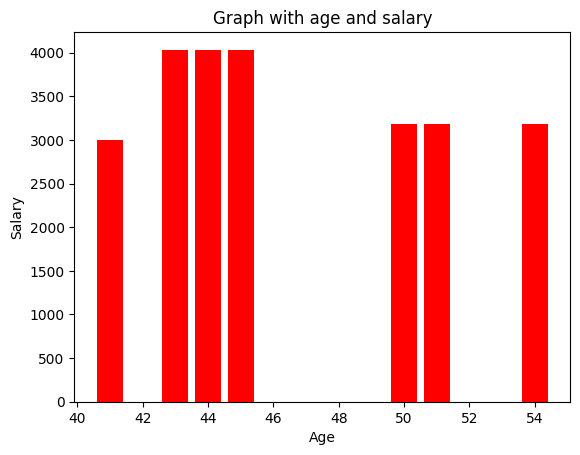

In [194]:
#chart with age and salary
x=df_filter["Age"]
y=df_filter["Salary"]
plt.bar(x,y,color="r")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Graph with age and salary")
plt.show()

In [182]:
numerical_columns=df.select_dtypes(include="number")
numerical_columns

,Age,Salary,Gender
0,20.0,5283.471074,0
1,30.0,5283.471074,0
2,35.0,2300.000000,0
3,40.0,3000.000000,0
4,23.0,4000.000000,0
...,...,...,...
142,22.0,8202.000000,0
143,33.0,9024.000000,1
145,44.0,4034.000000,1
146,33.0,5034.000000,1


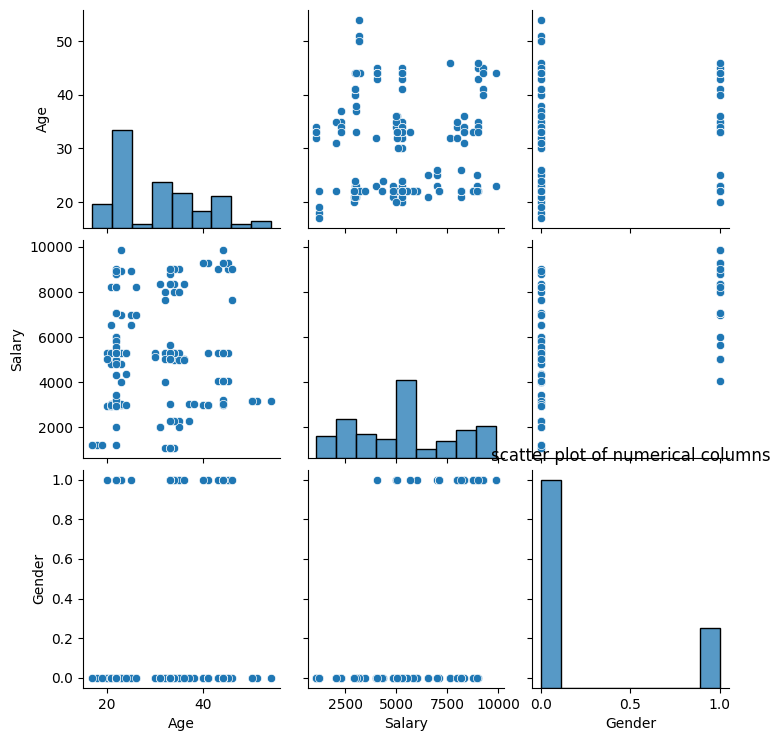

In [139]:
#pair plot
#scatter ploting of numerical columns
sns.pairplot(numerical_columns)
plt.title("scatter plot of numerical columns")
plt.show()

In [140]:
corr=numerical_columns.corr()
corr

,Age,Salary,Gender
Age,1.000000,-0.014086,0.066869
Salary,-0.014086,1.000000,0.633696
Gender,0.066869,0.633696,1.000000


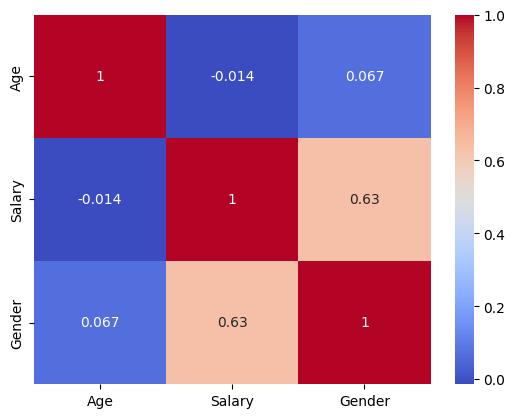

In [141]:
#heat map
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

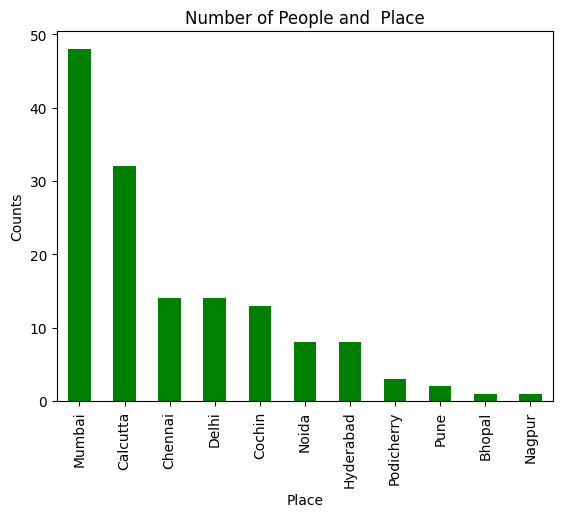

In [195]:
#Bar chart of no:of people in each places
place_count=df['Place'].value_counts()
place_count.plot(kind="bar",color="g")
plt.xlabel('Place')
plt.ylabel('Counts')
plt.title('Number of People and  Place')
plt.show()

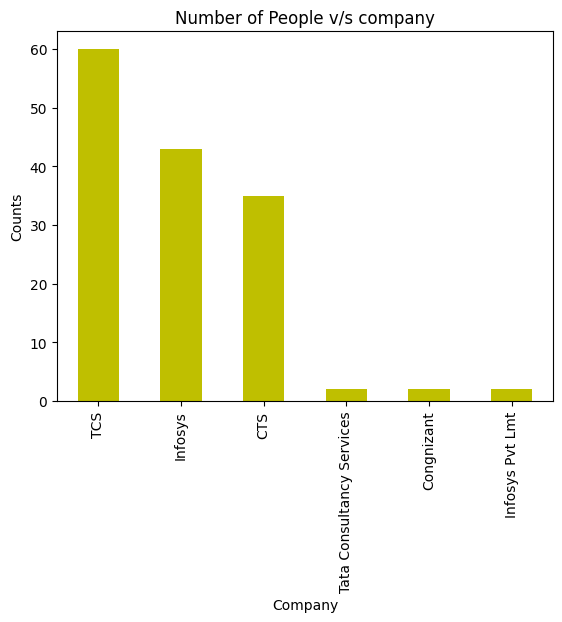

In [196]:
#Bar chart of no:of people in each Company
place_count=df['Company'].value_counts()
place_count.plot(kind="bar",color="y")
plt.xlabel('Company')
plt.ylabel('Counts')
plt.title('Number of People v/s company')
plt.show()

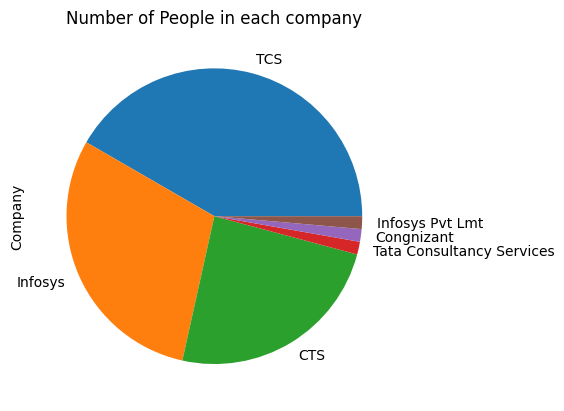

In [197]:
#pie chart of no:of people in each company
count=df['Company'].value_counts()
count.plot(kind="pie",label="Company")
plt.title('Number of People in each company')
plt.show()

## Encoding Categorical Variables

In [198]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [199]:
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [206]:
#onehot encoder
df_one_hot_encoded = pd.get_dummies(data = df, columns = ["Place", "Company","Country"])

print(df_one_hot_encoded )

      Age       Salary  Gender  Place_0  Place_1  Place_2  Place_3  Place_4  \
0    20.0  5283.471074       0    False    False     True    False    False   
1    30.0  5283.471074       0    False    False    False    False    False   
2    35.0  2300.000000       0    False     True    False    False    False   
3    40.0  3000.000000       0    False    False    False    False     True   
4    23.0  4000.000000       0    False    False    False    False    False   
..    ...          ...     ...      ...      ...      ...      ...      ...   
142  22.0  8202.000000       0    False    False    False    False    False   
143  33.0  9024.000000       1    False     True    False    False    False   
145  44.0  4034.000000       1    False    False    False    False     True   
146  33.0  5034.000000       1    False    False    False    False    False   
147  22.0  8202.000000       0    False    False    False     True    False   

     Place_5  Place_6  ...  Place_8  Place_9  Place

In [222]:
cols_to_encode = ["Place", "Company","Country"]
new_encoded_cols_names = []

# Create a list of new columns names
for col in cols_to_encode:
    new_encoded_cols_names += [f"is_{category}" for category in df[col].unique().tolist()]

print(new_encoded_cols_names)

# Inititalize and fit One Hot Encoder class from sklearn
one_hot_encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])

# As the output of the above transformer would be a sparse matrix, we need to convert it back to Pandas dataframe
df_encoded = pd.DataFrame(encoded_cols, columns = new_encoded_cols_names)
df_one_hot_encoded = df.join(df_encoded)

print(df_one_hot_encoded)

['is_2', 'is_6', 'is_1', 'is_4', 'is_9', 'is_3', 'is_8', 'is_5', 'is_0', 'is_7', 'is_10', 'is_4', 'is_2', 'is_0', 'is_5', 'is_1', 'is_3', 'is_0']
     Company   Age       Salary  Place  Country  Gender  is_2  is_6  is_1  \
0          4  20.0  5283.471074      2        0       0   0.0   0.0   1.0   
1          2  30.0  5283.471074      6        0       0   0.0   0.0   0.0   
2          4  35.0  2300.000000      1        0       0   0.0   1.0   0.0   
3          2  40.0  3000.000000      4        0       0   0.0   0.0   0.0   
4          4  23.0  4000.000000      6        0       0   0.0   0.0   0.0   
..       ...   ...          ...    ...      ...     ...   ...   ...   ...   
142        3  22.0  8202.000000      6        0       0   0.0   0.0   0.0   
143        4  33.0  9024.000000      1        0       1   0.0   0.0   0.0   
145        2  44.0  4034.000000      4        0       1   NaN   NaN   NaN   
146        4  33.0  5034.000000      6        0       1   NaN   NaN   NaN   
147    

In [214]:
#label encoder
label_encoder = LabelEncoder()
df1=df[["Place","Company","Country"]]
for i in df1:
    df[i] = label_encoder.fit_transform(df1[i])
df1

,Place,Company,Country
0,2,4,0
1,6,2,0
2,1,4,0
3,4,2,0
4,6,4,0
...,...,...,...
142,6,3,0
143,1,4,0
145,4,2,0
146,6,4,0


In [213]:
df1.Place.value_counts()

Place
6     48
1     32
2     14
4     14
3     13
8      8
5      8
9      3
10     2
0      1
7      1
Name: count, dtype: int64

In [212]:
df1.Company.value_counts()

Company
4    60
2    43
0    35
5     2
1     2
3     2
Name: count, dtype: int64

In [216]:
df1.Country.value_counts()

Country
0    144
Name: count, dtype: int64

## Feature Scaling

In [221]:
#standard scaler
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data
print(scaled_data)


[[ 0.99148921 -1.16064614  0.         -0.89325451  0.         -0.53452248]
 [-0.23932498 -0.04864984  0.          0.7505621   0.         -0.53452248]
 [ 0.99148921  0.50734831 -1.26412245 -1.30420866  0.         -0.53452248]
 [-0.23932498  1.06334646 -0.96752641 -0.07134621  0.         -0.53452248]
 [ 0.99148921 -0.82704725 -0.54381778  0.7505621   0.         -0.53452248]
 [-0.23932498 -0.93824688 -0.12010914 -1.30420866  0.         -0.53452248]
 [ 0.99148921 -0.93824688  0.30359949 -0.89325451  0.          1.87082869]
 [-0.23932498 -0.82704725  0.72730813  0.7505621   0.          1.87082869]
 [ 0.99148921  0.39614868  1.15101676 -1.30420866  0.          1.87082869]
 [-1.47013917  1.61934461  1.57472539 -0.07134621  0.         -0.53452248]
 [-1.47013917 -0.82704725  0.          0.7505621   0.         -0.53452248]
 [-1.47013917  0.39614868 -1.77723361 -1.30420866  0.         -0.53452248]
 [-1.47013917  1.61934461  0.         -0.89325451  0.         -0.53452248]
 [-1.47013917 -1.3830454 

In [220]:
#minmax scaler
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data
print(scaled_data)


[[0.8        0.08108108 0.47734962 0.2        0.         0.        ]
 [0.4        0.35135135 0.47734962 0.6        0.         0.        ]
 [0.8        0.48648649 0.13781723 0.1        0.         0.        ]
 [0.4        0.62162162 0.21748037 0.4        0.         0.        ]
 [0.8        0.16216216 0.33128485 0.6        0.         0.        ]
 [0.4        0.13513514 0.44508934 0.1        0.         0.        ]
 [0.8        0.13513514 0.55889382 0.2        0.         1.        ]
 [0.4        0.16216216 0.6726983  0.6        0.         1.        ]
 [0.8        0.45945946 0.78650279 0.1        0.         1.        ]
 [0.         0.75675676 0.90030727 0.4        0.         0.        ]
 [0.         0.16216216 0.47734962 0.6        0.         0.        ]
 [0.         0.45945946 0.         0.1        0.         0.        ]
 [0.         0.75675676 0.47734962 0.2        0.         0.        ]
 [0.         0.02702703 0.01650165 0.6        0.         0.        ]
 [0.4        0.62162162 0.21748037